In [240]:
!pip install google-play-scraper

# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews, Sort, reviews_all

import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi
from sklearn.metrics import accuracy_score

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks

import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stopwords) dalam berbagai bahasa.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [241]:
shopee_reviews_df = pd.read_csv('https://raw.githubusercontent.com/abdul-rar/proyek_analisis_sentimen/refs/heads/main/shopee_reviews.csv')
shopee_reviews_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,4b40d247-239d-4a43-a892-0ce067e7c643,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,saya sangat puas belanja di shopee barang2nya ...,5,0,NaN,2025-03-23 11:45:15,"Hai kak Via Okta, aku ikut seneng kalau kamu p...",2025-03-23 12:39:23,NaN
1,6ad58e6f-5366-49f6-8a83-29792733a7d9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,suka,5,0,3.45.60,2025-03-23 11:45:02,"Hai kak Umi Faqih, aku ikut seneng kalau kamu ...",2025-03-23 12:20:56,3.45.60
2,b24b3d62-b7ce-4cab-a1aa-46144692c0c0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sangat bagus untuk orang yang malas ke mol,5,0,NaN,2025-03-23 11:44:54,"Hai kak Haikal Ali, thanks ya bintang dan ulas...",2025-03-23 12:50:25,NaN
3,04647273-3486-43a7-aa99-eacb61e2ae4b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"aplikasinya bagus ,terjamin tapi apk nya terla...",5,0,NaN,2025-03-23 11:44:32,"Hi kak Alam Yeager, maaf ya udah buat resah. Y...",2025-03-23 12:30:00,NaN
4,0f2c6f21-ec0f-45b5-8d3d-6132689a423f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,semoga selalu amanah dan sukses,5,0,3.46.37,2025-03-23 11:43:58,"Hai kak salman alfarisi, thanks ya bintang dan...",2025-03-23 12:24:51,3.46.37
...,...,...,...,...,...,...,...,...,...,...,...
10495,9a690daf-48a6-49b9-bc52-2e55c0132af4,Siti Khotijah,https://play-lh.googleusercontent.com/a/ACg8oc...,sangat puas dengan aplikasi shopee,5,0,NaN,2025-03-17 07:27:39,"Hi Kak Siti Khotijah, makasih ya untuk review ...",2025-03-17 08:24:17,NaN
10496,2acdacab-ccdd-40a0-b41d-a4cf654bc0ed,marlon senewe,https://play-lh.googleusercontent.com/a-/ALV-U...,Dari Tahun ke Tahun shope SPX semakin ngk jelas,1,0,3.45.60,2025-03-17 07:25:31,"Hi kak, maaf terkait kendala pengiriman yang l...",2023-12-06 20:28:25,3.45.60
10497,08b0ed42-4316-4eaf-bf87-1742b6662b40,Marthi Pratabeles,https://play-lh.googleusercontent.com/a/ACg8oc...,"Sangat membantu..perlu apa"" cari di shopee.",5,0,3.45.60,2025-03-17 07:23:38,"Hi Kak Marthi Pratabeles, makasih ya untuk rev...",2025-03-17 08:23:41,3.45.60
10498,cc83a41e-68f6-4325-88ec-f73e93687676,kicu basah,https://play-lh.googleusercontent.com/a/ACg8oc...,"diskon sekarang dikit tdk seperti dulu,.. tp k...",4,0,3.45.60,2025-03-17 07:21:46,"Hi Kak, makasih ya untuk review-nya. Kami akan...",2025-03-17 08:47:19,3.45.60


In [242]:
shopee_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              10500 non-null  object
 1   userName              10500 non-null  object
 2   userImage             10500 non-null  object
 3   content               10500 non-null  object
 4   score                 10500 non-null  int64 
 5   thumbsUpCount         10500 non-null  int64 
 6   reviewCreatedVersion  8412 non-null   object
 7   at                    10500 non-null  object
 8   replyContent          9370 non-null   object
 9   repliedAt             9370 non-null   object
 10  appVersion            8412 non-null   object
dtypes: int64(2), object(9)
memory usage: 902.5+ KB


mengisi kolom null dengan 'unknown'

In [243]:
shopee_reviews_df.isna().sum()

,0
reviewId,0
userName,0
userImage,0
content,0
score,0
thumbsUpCount,0
reviewCreatedVersion,2088
at,0
replyContent,1130
repliedAt,1130


In [244]:
clean_df = shopee_reviews_df.fillna('unknown')
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,4b40d247-239d-4a43-a892-0ce067e7c643,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,saya sangat puas belanja di shopee barang2nya ...,5,0,unknown,2025-03-23 11:45:15,"Hai kak Via Okta, aku ikut seneng kalau kamu p...",2025-03-23 12:39:23,unknown
1,6ad58e6f-5366-49f6-8a83-29792733a7d9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,suka,5,0,3.45.60,2025-03-23 11:45:02,"Hai kak Umi Faqih, aku ikut seneng kalau kamu ...",2025-03-23 12:20:56,3.45.60
2,b24b3d62-b7ce-4cab-a1aa-46144692c0c0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sangat bagus untuk orang yang malas ke mol,5,0,unknown,2025-03-23 11:44:54,"Hai kak Haikal Ali, thanks ya bintang dan ulas...",2025-03-23 12:50:25,unknown
3,04647273-3486-43a7-aa99-eacb61e2ae4b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"aplikasinya bagus ,terjamin tapi apk nya terla...",5,0,unknown,2025-03-23 11:44:32,"Hi kak Alam Yeager, maaf ya udah buat resah. Y...",2025-03-23 12:30:00,unknown
4,0f2c6f21-ec0f-45b5-8d3d-6132689a423f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,semoga selalu amanah dan sukses,5,0,3.46.37,2025-03-23 11:43:58,"Hai kak salman alfarisi, thanks ya bintang dan...",2025-03-23 12:24:51,3.46.37
...,...,...,...,...,...,...,...,...,...,...,...
10495,9a690daf-48a6-49b9-bc52-2e55c0132af4,Siti Khotijah,https://play-lh.googleusercontent.com/a/ACg8oc...,sangat puas dengan aplikasi shopee,5,0,unknown,2025-03-17 07:27:39,"Hi Kak Siti Khotijah, makasih ya untuk review ...",2025-03-17 08:24:17,unknown
10496,2acdacab-ccdd-40a0-b41d-a4cf654bc0ed,marlon senewe,https://play-lh.googleusercontent.com/a-/ALV-U...,Dari Tahun ke Tahun shope SPX semakin ngk jelas,1,0,3.45.60,2025-03-17 07:25:31,"Hi kak, maaf terkait kendala pengiriman yang l...",2023-12-06 20:28:25,3.45.60
10497,08b0ed42-4316-4eaf-bf87-1742b6662b40,Marthi Pratabeles,https://play-lh.googleusercontent.com/a/ACg8oc...,"Sangat membantu..perlu apa"" cari di shopee.",5,0,3.45.60,2025-03-17 07:23:38,"Hi Kak Marthi Pratabeles, makasih ya untuk rev...",2025-03-17 08:23:41,3.45.60
10498,cc83a41e-68f6-4325-88ec-f73e93687676,kicu basah,https://play-lh.googleusercontent.com/a/ACg8oc...,"diskon sekarang dikit tdk seperti dulu,.. tp k...",4,0,3.45.60,2025-03-17 07:21:46,"Hi Kak, makasih ya untuk review-nya. Kami akan...",2025-03-17 08:47:19,3.45.60


In [245]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              10500 non-null  object
 1   userName              10500 non-null  object
 2   userImage             10500 non-null  object
 3   content               10500 non-null  object
 4   score                 10500 non-null  int64 
 5   thumbsUpCount         10500 non-null  int64 
 6   reviewCreatedVersion  10500 non-null  object
 7   at                    10500 non-null  object
 8   replyContent          10500 non-null  object
 9   repliedAt             10500 non-null  object
 10  appVersion            10500 non-null  object
dtypes: int64(2), object(9)
memory usage: 902.5+ KB


In [246]:
clean_df.drop_duplicates()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,4b40d247-239d-4a43-a892-0ce067e7c643,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,saya sangat puas belanja di shopee barang2nya ...,5,0,unknown,2025-03-23 11:45:15,"Hai kak Via Okta, aku ikut seneng kalau kamu p...",2025-03-23 12:39:23,unknown
1,6ad58e6f-5366-49f6-8a83-29792733a7d9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,suka,5,0,3.45.60,2025-03-23 11:45:02,"Hai kak Umi Faqih, aku ikut seneng kalau kamu ...",2025-03-23 12:20:56,3.45.60
2,b24b3d62-b7ce-4cab-a1aa-46144692c0c0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sangat bagus untuk orang yang malas ke mol,5,0,unknown,2025-03-23 11:44:54,"Hai kak Haikal Ali, thanks ya bintang dan ulas...",2025-03-23 12:50:25,unknown
3,04647273-3486-43a7-aa99-eacb61e2ae4b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"aplikasinya bagus ,terjamin tapi apk nya terla...",5,0,unknown,2025-03-23 11:44:32,"Hi kak Alam Yeager, maaf ya udah buat resah. Y...",2025-03-23 12:30:00,unknown
4,0f2c6f21-ec0f-45b5-8d3d-6132689a423f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,semoga selalu amanah dan sukses,5,0,3.46.37,2025-03-23 11:43:58,"Hai kak salman alfarisi, thanks ya bintang dan...",2025-03-23 12:24:51,3.46.37
...,...,...,...,...,...,...,...,...,...,...,...
10495,9a690daf-48a6-49b9-bc52-2e55c0132af4,Siti Khotijah,https://play-lh.googleusercontent.com/a/ACg8oc...,sangat puas dengan aplikasi shopee,5,0,unknown,2025-03-17 07:27:39,"Hi Kak Siti Khotijah, makasih ya untuk review ...",2025-03-17 08:24:17,unknown
10496,2acdacab-ccdd-40a0-b41d-a4cf654bc0ed,marlon senewe,https://play-lh.googleusercontent.com/a-/ALV-U...,Dari Tahun ke Tahun shope SPX semakin ngk jelas,1,0,3.45.60,2025-03-17 07:25:31,"Hi kak, maaf terkait kendala pengiriman yang l...",2023-12-06 20:28:25,3.45.60
10497,08b0ed42-4316-4eaf-bf87-1742b6662b40,Marthi Pratabeles,https://play-lh.googleusercontent.com/a/ACg8oc...,"Sangat membantu..perlu apa"" cari di shopee.",5,0,3.45.60,2025-03-17 07:23:38,"Hi Kak Marthi Pratabeles, makasih ya untuk rev...",2025-03-17 08:23:41,3.45.60
10498,cc83a41e-68f6-4325-88ec-f73e93687676,kicu basah,https://play-lh.googleusercontent.com/a/ACg8oc...,"diskon sekarang dikit tdk seperti dulu,.. tp k...",4,0,3.45.60,2025-03-17 07:21:46,"Hi Kak, makasih ya untuk review-nya. Kami akan...",2025-03-17 08:47:19,3.45.60


**Pre-processing Data**

In [247]:
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
nltk.download('punkt_tab')

def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka

    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text

def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text

def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text

def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy","woyy","kan","wkwk","hehe","ah","wk","wkwkwk"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

slangwords = {"udah":"sudah", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget",
              "bgtt": "banget", "lg":"lagi", "yg": "yang", "ig":"instagram","apk":"aplikasi","mesen":"memesan","mesan":"memesan",
              "maks": "maksimal","ngak":"tidak","nggak":"tidak", "mo":"mau","mol":"mall", "+":"dan", "slowresp":"lambat", "fastresp":"cepat",
              "ok":"bagus","cod":"datang", "males":"malas", "skli":"sekali","klu":"kalau","klo":"kalau","lgsg":"langsung","org":"orang",
              "ga":"tidak","vhocer":"voucher","luv":"suka","luuuuvvv":"cinta","luuvvv":"cinta","apklsi":"aplikasi", "brg":"barang","pdk":"produk",
              "mwaantaap":"mantap","Pwuuuuaassz":"puas","sy":"saya","ak":"aku","km":"kamu","utk":"untuk","jdi":"jadi","jd":"jadi","tp":"tapi",
              "n":"dan", "min":"admin","burik":"jelek"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [248]:
print(clean_df['content'].iloc[400:450])

400                                    sangat bermanfaat
401                                aplikasi sampah lemot
402                  sangat puas sekali belanja d shopie
403                                               mantap
404                                               baguss
405                                                bagus
406                         app yg membantu sangat bagus
407    semenjak aku ada aplikasi shopee jdi gampang b...
408    Aplikasinya sih ini bagus tapi kenapa sering n...
409    sangat berguna bagi saya yang malas belanja ke...
410                           gimana inih aku gak ngerti
411                                                   ok
412                                          Masya Allah
413                                                mudah
414    aku suka shopee tapi aku tidak bisa belanja di...
415                                      sangat membantu
416    gimana ya ini min cara bayar Shopee paylater s...
417    semuanya baik,cuman satu

In [249]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [250]:
clean_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,4b40d247-239d-4a43-a892-0ce067e7c643,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,saya sangat puas belanja di shopee barang2nya ...,5,0,unknown,2025-03-23 11:45:15,"Hai kak Via Okta, aku ikut seneng kalau kamu p...",2025-03-23 12:39:23,unknown,saya sangat puas belanja di shopee barangnya t...,saya sangat puas belanja di shopee barangnya t...,saya sangat puas belanja di shopee barangnya t...,"[saya, sangat, puas, belanja, di, shopee, bara...","[puas, belanja, shopee, barangnya, mengecewakan]",puas belanja shopee barangnya mengecewakan
1,6ad58e6f-5366-49f6-8a83-29792733a7d9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,suka,5,0,3.45.60,2025-03-23 11:45:02,"Hai kak Umi Faqih, aku ikut seneng kalau kamu ...",2025-03-23 12:20:56,3.45.60,suka,suka,suka,[suka],[suka],suka
2,b24b3d62-b7ce-4cab-a1aa-46144692c0c0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sangat bagus untuk orang yang malas ke mol,5,0,unknown,2025-03-23 11:44:54,"Hai kak Haikal Ali, thanks ya bintang dan ulas...",2025-03-23 12:50:25,unknown,sangat bagus untuk orang yang malas ke mol,sangat bagus untuk orang yang malas ke mol,sangat bagus untuk orang yang malas ke mall,"[sangat, bagus, untuk, orang, yang, malas, ke,...","[bagus, orang, malas, mall]",bagus orang malas mall
3,04647273-3486-43a7-aa99-eacb61e2ae4b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"aplikasinya bagus ,terjamin tapi apk nya terla...",5,0,unknown,2025-03-23 11:44:32,"Hi kak Alam Yeager, maaf ya udah buat resah. Y...",2025-03-23 12:30:00,unknown,aplikasinya bagus terjamin tapi apk nya terlal...,aplikasinya bagus terjamin tapi apk nya terlal...,aplikasinya bagus terjamin tapi aplikasi nya t...,"[aplikasinya, bagus, terjamin, tapi, aplikasi,...","[aplikasinya, bagus, terjamin, aplikasi, berat]",aplikasinya bagus terjamin aplikasi berat
4,0f2c6f21-ec0f-45b5-8d3d-6132689a423f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,semoga selalu amanah dan sukses,5,0,3.46.37,2025-03-23 11:43:58,"Hai kak salman alfarisi, thanks ya bintang dan...",2025-03-23 12:24:51,3.46.37,semoga selalu amanah dan sukses,semoga selalu amanah dan sukses,semoga selalu amanah dan sukses,"[semoga, selalu, amanah, dan, sukses]","[semoga, amanah, sukses]",semoga amanah sukses


**Pelabelan**

In [251]:
import csv
import requests
from io import StringIO

# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [252]:
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:

    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''
    # Inisialisasi variabel polaritas

    if (score >= 2):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 2, maka polaritas adalah positif
    elif (score <= -2):
        polarity = 'negative'
        # Jika skor sentimen kurang dari -2, maka polaritas adalah negatif
    else:
        polarity = 'neutral'
    # Ini adalah bagian yang bisa digunakan untuk menentukan polaritas netral jika diperlukan

    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [253]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    3946
neutral     3437
negative    3117
Name: count, dtype: int64


In [254]:
clean_df['polarity_score'].describe()

,polarity_score
count,10500.000000
mean,0.429238
std,5.164431
min,-51.000000
25%,-2.000000
50%,0.000000
75%,3.000000
max,37.000000


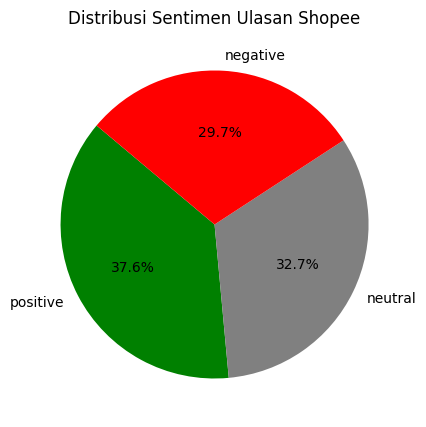

In [255]:
import matplotlib.pyplot as plt

# Hitung jumlah masing-masing sentimen
sentiment_counts = clean_df['polarity'].value_counts()

# Buat pie chart
plt.figure(figsize=(5, 5))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140,
        colors=['green', 'gray', 'red'])
plt.title("Distribusi Sentimen Ulasan Shopee")
plt.show()


**Data Splitting**

In [256]:
# Pisahkan data menjadi fitur (review pengguna) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['polarity']

# Ekstraksi Fitur dan Modeling
dibedakan pelatihan dan ekstraksi fiturnya sehingga ada 4 kombinasi

In [257]:
from sklearn.model_selection import train_test_split

In [258]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

## Skema 1
Pelatihan: SVM, Ekstraksi Fitur: TF-IDF

In [259]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Buat model SVM
svm_model = SVC(C=1.5,kernel="rbf")

# Latih model
svm_model.fit(X_train, y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_svm = svm_model.predict(X_train.toarray())
y_pred_test_svm = svm_model.predict(X_test.toarray())

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_svm = accuracy_score(y_pred_train_svm, y_train)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_svm = accuracy_score(y_pred_test_svm, y_test)

# Menampilkan akurasi
print('SVM, TF-IDF - accuracy_train:', accuracy_train_svm)
print('SVM, TF-IDF - accuracy_test:', accuracy_test_svm)


SVM, TF-IDF - accuracy_train: 0.9367857142857143
SVM, TF-IDF - accuracy_test: 0.8547619047619047


In [260]:
import pickle

# Simpan Model SVM
with open("svm_tfidf_model.pkl", "wb") as model_file:
    pickle.dump(svm_model, model_file)

# Simpan TF-IDF Vectorizer
with open("tfidf_vectorizer.pkl", "wb") as vec_file:
    pickle.dump(tfidf, vec_file)

print("Model SVM dan TF-IDF vectorizer berhasil disimpan!")

Model SVM dan TF-IDF vectorizer berhasil disimpan!


## Skema 2
Pelatihan: SVM, Ekstraksi Fitur: BoW

In [261]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(X)

features_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

X_train, X_test, y_train, y_test = train_test_split(bow_matrix, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(X_train, y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_svm = svm_model.predict(X_train.toarray())
y_pred_test_svm = svm_model.predict(X_test.toarray())

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_svm = accuracy_score(y_pred_train_svm, y_train)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_svm = accuracy_score(y_pred_test_svm, y_test)

# Menampilkan akurasi
print('SVM, BoW - accuracy_train:', accuracy_train_svm)
print('SVM, BoW - accuracy_test:', accuracy_test_svm)

SVM, BoW - accuracy_train: 0.9804761904761905
SVM, BoW - accuracy_test: 0.8876190476190476


In [262]:
import pickle

# Simpan model SVM ke file
with open("svm_bow_model.pkl", "wb") as model_file:
    pickle.dump(svm_model, model_file)

# Simpan CountVectorizer ke file
with open("bow_vectorizer.pkl", "wb") as vec_file:
    pickle.dump(vectorizer, vec_file)

print("Model SVM dan BoW Vectorizer berhasil disimpan!")


Model SVM dan BoW Vectorizer berhasil disimpan!


## Skema 3
Pelatihan: RF, Ekstraksi Fitur: BoW

In [263]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(X)

features_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

X_train, X_test, y_train, y_test = train_test_split(bow_matrix, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = rf_model.predict(X_train.toarray())
y_pred_test_rf = rf_model.predict(X_test.toarray())

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print('RF, BoW - accuracy_train:', accuracy_train_rf)
print('RF, BoW - accuracy_test:', accuracy_test_rf)

RF, BoW - accuracy_train: 0.9998809523809524
RF, BoW - accuracy_test: 0.8609523809523809


In [264]:
import pickle

# Simpan model SVM ke file
with open("rf_bow_model.pkl", "wb") as model_file:
    pickle.dump(svm_model, model_file)

# Simpan CountVectorizer ke file
with open("bow_vectorizer.pkl", "wb") as vec_file:
    pickle.dump(vectorizer, vec_file)

print("Model SVM dan BoW Vectorizer berhasil disimpan!")


Model SVM dan BoW Vectorizer berhasil disimpan!


## **Kesimpulan accuracy**
Skema 1:

- training = 93,68%
- testing = 85,47%

Skema 2:

- training = 98,04%
- testing = 88,76%

Skema 3:

- training = 99,98%
- testing = 86,09%
